In [1]:
!pip install tweepy
!pip install pymongo
!pip install wordcloud
!pip install stop_words
!pip install nltk
!pip install textblob
!pip install googletrans
!pip install py_translator==2.1.9
!pip install emoji
!pip install ipywidgets
!pip install sklearn
!pip install re

ERROR: Could not find a version that satisfies the requirement py_translator==2.1.9 (from versions: none)
ERROR: No matching distribution found for py_translator==2.1.9


ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [2]:
import sys

In [3]:
import numpy as np
import pandas as pd
import tweepy
import matplotlib.pyplot as plt
import pymongo
import ipywidgets as wgt
from IPython.display import display
from sklearn.feature_extraction.text import CountVectorizer
import re
from datetime import datetime

%matplotlib inline

In [11]:
api_key = "pCRLPdf2lkjpRX9Uczpt2gVBb" 
api_secret = "G1Wv7sTLMYF3cr5LbL8S9uj2g2LFrdWp8X8t7Ft3sIpW0kbqgD" 
access_token = "100875722-7m5vhOzpw2LYrB7P8ISnTqtGYMMvVTqwx3X4EyJY" 
access_token_secret = "uPEymGiszhiJEVWD4Alo1pzMUJx1ymo3Fd4HWyRPRBN3r" 

auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)
col = pymongo.MongoClient()["DataWranglingDay1"]["Trump"]
col.count()

<ipython-input-11-92cedcf66698>:11: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  col.count()


17138

In [9]:
class MyStreamListener(tweepy.StreamListener):
    
    counter = 0
    
    def __init__(self, max_tweets=3000, *args, **kwargs):
        self.max_tweets = max_tweets
        self.counter = 0
        super().__init__(*args, **kwargs)
    
    def on_connect(self):
        self.counter = 0
        self.start_time = datetime.now()
    
    def on_status(self, status):
        
        self.counter += 1
        
        
        col.insert_one(status._json)
        
        
        if self.counter % 1 == 0:
            value = int(100.00 * self.counter / self.max_tweets)
            mining_time = datetime.now() - self.start_time
            progress_bar.value = value
            html_value = """<span class="label label-primary">Tweets/Sec: %.1f</span>""" % (self.counter / max([1,mining_time.seconds]))
            html_value += """ <span class="label label-success">Progress: %.1f%%</span>""" % (self.counter / self.max_tweets * 100.0)
            html_value += """ <span class="label label-info">ETA: %.1f Sec</span>""" % ((self.max_tweets - self.counter) / (self.counter / max([1,mining_time.seconds])))
            wgt_status.value = html_value
           
            if self.counter >= self.max_tweets:
                myStream.disconnect()
                print("Finished")
                print("Total Mining Time: %s" % (mining_time))
                print("Tweets/Sec: %.1f" % (self.max_tweets / mining_time.seconds))
                progress_bar.value = 0
                
    
myStreamListener = MyStreamListener(max_tweets=5000)
myStream = tweepy.Stream(auth = api.auth, listener=myStreamListener)
keywords = ["Trump",""
           ]


progress_bar = wgt.IntProgress(value=0)
display(progress_bar)
wgt_status = wgt.HTML(value="""<span class="label label-primary">Tweets/Sec: 0.0</span>""")
display(wgt_status)


for error_counter in range(20):
    try:
        myStream.filter(track=keywords)
        print("Tweets collected: %s" % myStream.listener.counter)
        print("Total tweets in collection: %s" % col.count())
        break
    except:
        print("ERROR# %s" % (error_counter + 1))

IntProgress(value=0)

HTML(value='<span class="label label-primary">Tweets/Sec: 0.0</span>')

Finished
Total Mining Time: 0:01:39.953139
Tweets/Sec: 50.5
Tweets collected: 5000
Total tweets in collection: 17138


<ipython-input-9-2691cab47438>:55: DeprecationWarning: count is deprecated. Use estimated_document_count or count_documents instead. Please note that $where must be replaced by $expr, $near must be replaced by $geoWithin with $center, and $nearSphere must be replaced by $geoWithin with $centerSphere
  print("Total tweets in collection: %s" % col.count())


In [10]:
col.find_one()

{'_id': ObjectId('5f96484775acb886fc06bd20'),
 'created_at': 'Mon Oct 26 03:53:38 +0000 2020',
 'id': 1320574280518803456,
 'id_str': '1320574280518803456',
 'text': 'RT @btsvotingorg: 📢 2020 APAN MUSIC AWARDS\n\nBTS is nominated under Male Popularity Category. It is 100% based on fan voting. \n\n🗳️ Voting Pe…',
 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 833700201852452864,
  'id_str': '833700201852452864',
  'name': '𝐟𝐢𝐞𝐲𝐳𝐚⁷ ⟭⟬ᴰ² ♡ 𝐁𝐄𝐢𝐬𝐜𝐨𝐦𝐢𝐧𝐠 ❥︎',
  'screen_name': 'yooniechim_',
  'location': 'Malaysia',
  'url': None,
  'description': '#BTS : we are not seven with you 💜 #yoonmin \n\n              #BTSARMY only ✊!!',
  'translator_type': 'none',
  'protected': False,
  'verified': False,
  'followers_count': 932,
  'friends_count'

In [12]:
dataset = [{"created_at": item["created_at"],
            "text": item["text"],
            "user": "@%s" % item["user"]["screen_name"],
            "source": item["source"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset = pd.DataFrame(dataset)

dataset

,created_at,text,user,source,lang
0,Mon Oct 26 03:53:38 +0000 2020,RT @btsvotingorg: 📢 2020 APAN MUSIC AWARDS\n\n...,@yooniechim_,"<a href=""http://twitter.com/download/android"" ...",en
1,Mon Oct 26 03:53:38 +0000 2020,"CNN: Press Wrong to Say Trump Could Win, Biden...",@INFSoldier76,"<a href=""http://twitter.com/#!/download/ipad"" ...",en
2,Mon Oct 26 03:53:38 +0000 2020,RT @forevergift_R: 【フォロー＆RT #プレゼント】\n\nFGちゃん ×...,@chiba_sute,"<a href=""https://about.twitter.com/products/tw...",ja
3,Mon Oct 26 03:53:38 +0000 2020,@wendywang55 @JoeBiden Your imaginations don’t...,@ketheesh_waran,"<a href=""http://twitter.com/download/iphone"" r...",en
4,Mon Oct 26 03:53:38 +0000 2020,@H4g5YZTqskgrowe ……落選😿\n\n残念！明日も12時から！\n魔法科高校超...,@KADOKAWA_denshi,"<a href=""http://www.aainc.co.jp/"" rel=""nofollo...",ja
...,...,...,...,...,...
17133,Mon Oct 26 04:05:54 +0000 2020,RT @ShahidForChange: @NaomiAKlein @AOC Some of...,@NicoGillespie,"<a href=""http://twitter.com/download/iphone"" r...",en
17134,Mon Oct 26 04:05:54 +0000 2020,"Hey, @LesleyRStahl you should have watched the...",@SandraLeeStewa2,"<a href=""https://mobile.twitter.com"" rel=""nofo...",en
17135,Mon Oct 26 04:05:54 +0000 2020,@me_think_free Neither Trump has him!,@lidell_a,"<a href=""http://twitter.com/download/android"" ...",en
17136,Mon Oct 26 04:05:54 +0000 2020,RT @pwrfulwomantoo: Talk about US election int...,@TigerMary4Trump,"<a href=""http://twitter.com/download/iphone"" r...",en


In [13]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(dataset.text)

word_count = pd.DataFrame(cv.get_feature_names(), columns=["word"])
word_count["count"] = count_matrix.sum(axis=0).tolist()[0]
word_count = word_count.sort_values("count", ascending=False).reset_index(drop=True)
word_count[:50]

,word,count
0,rt,13141
1,trump,9354
2,the,8163
3,https,5533
4,to,5186
5,co,4901
6,is,4631
7,and,4013
8,of,3510
9,this,3257


<ipython-input-14-a8481ec67a37>:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dataset.source_name = dataset.source.apply(get_source_name)


iembot                   16
Echoes Act2              18
IFTTT                    21
Tweetbot for iΟS         27
WordPress.com            44
TweetDeck                51
Twitter for iPad       1114
Twitter Web App        3457
Twitter for Android    4912
Twitter for iPhone     7221
Name: source, dtype: int64

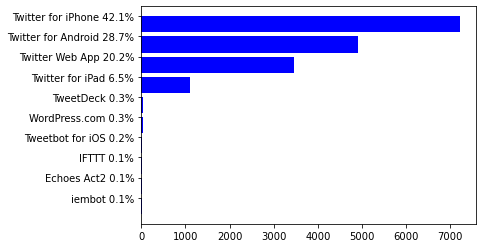

In [14]:
def get_source_name(x):
    value = re.findall(pattern="<[^>]+>([^<]+)</a>", string=x)
    if len(value) > 0:
        return value[0]
    else:
        return ""
dataset.source_name = dataset.source.apply(get_source_name)

source_counts = dataset.source_name.value_counts().sort_values()[-10:]

bottom = [index for index, item in enumerate(source_counts.index)]
plt.barh(bottom, width=source_counts, color="blue", linewidth=0)

y_labels = ["%s %.1f%%" % (item, 100.0*source_counts[item]/len(dataset)) for index,item in enumerate(source_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)

source_counts

hi        37
fr        61
pt        82
in        89
th        94
ko       109
es       312
und      660
ja       661
en     14797
Name: lang, dtype: int64

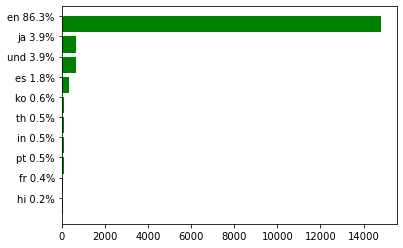

In [15]:
lang_counts = dataset.lang.value_counts().sort_values()[-10:]
bottom = [index for index, item in enumerate(lang_counts.index)]
plt.barh(bottom, width=lang_counts, color="green", linewidth=0)
y_labels = ["%s %.1f%%" % (item, 100.0*lang_counts[item]/len(dataset)) for index,item in enumerate(lang_counts.index)]
plt.yticks(np.array(bottom)+0.4, y_labels)
lang_counts

In [16]:
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
from  textblob import TextBlob

In [17]:
dataset1 = [{"id": item["id"],
            "text": item["text"],
            "lang":item["lang"],
            
           } for item in col.find()]

dataset1 = pd.DataFrame(dataset1)

is_dataset1=dataset1.lang=="en"
dataset1=dataset1[is_dataset1]
dataset1

,id,text,lang
0,1320574280518803456,RT @btsvotingorg: 📢 2020 APAN MUSIC AWARDS\n\n...,en
1,1320574280481071109,"CNN: Press Wrong to Say Trump Could Win, Biden...",en
3,1320574280493527042,@wendywang55 @JoeBiden Your imaginations don’t...,en
6,1320574280720130054,RT @JoeBiden: I don’t look at this the way Don...,en
9,1320574280669814786,RT @HeatherIAm23: What is the biggest threat r...,en
...,...,...,...
17133,1320577366733840385,RT @ShahidForChange: @NaomiAKlein @AOC Some of...,en
17134,1320577366662410242,"Hey, @LesleyRStahl you should have watched the...",en
17135,1320577366960209920,@me_think_free Neither Trump has him!,en
17136,1320577366658170880,RT @pwrfulwomantoo: Talk about US election int...,en


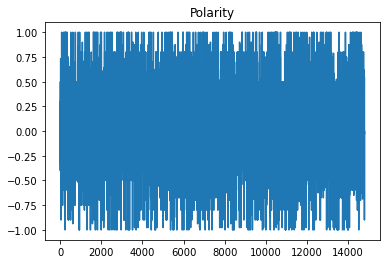

In [18]:
tweettext=dataset1['text']
wordlist=pd.DataFrame();

polarity=[]
subj=[]

for t in tweettext:
    tx= TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})
poltweet.polarity.plot(title='Polarity')
plt.show()

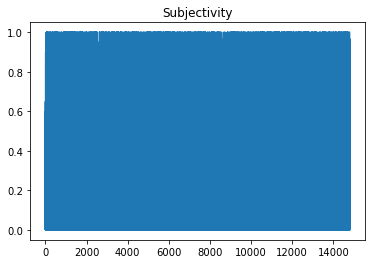

In [19]:
poltweet.subjectivity.plot(title='Subjectivity')
plt.show()

In [20]:
import statistics
statistics.mean(poltweet.polarity)

0.054761135788773056

In [21]:
import statistics
statistics.mean(poltweet.subjectivity)

0.35649747297113077

In [22]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk import sent_tokenize, word_tokenize
from wordcloud import WordCloud, STOPWORDS

def wc(data,bgcolor,title):
    plt.figure(figsize = (100,100))
    wc = WordCloud(background_color = bgcolor, max_words = 1000,  max_font_size = 50)
    wc.generate(' '.join(data))
    plt.imshow(wc)
    plt.axis('off')

In [23]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
import re
top_N = 100


a = dataset1['text'].str.lower().str.cat(sep=' ')


b = re.sub('[^A-Za-z]+', ' ', a)
nltk.download('stopwords')
nltk.download('punkt')
stop_words = list(get_stop_words('en'))         
nltk_words = list(stopwords.words('english'))   
stop_words.extend(nltk_words)
word_tokens = word_tokenize(b)
filtered_sentence = [w for w in word_tokens if not w in stop_words]
filtered_sentence = []
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


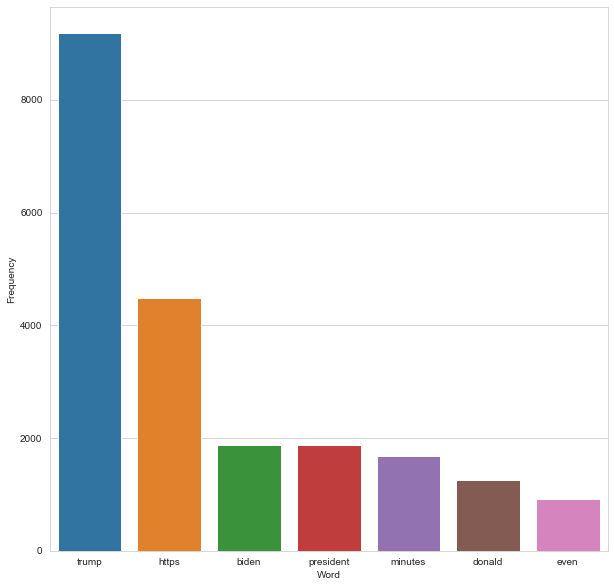

In [24]:
import seaborn as sns
 
without_single_chr = [word for word in filtered_sentence if len(word) > 2]


cleaned_data_title = [word for word in without_single_chr if not word.isnumeric()]        


word_dist = nltk.FreqDist(cleaned_data_title)
rslt = pd.DataFrame(word_dist.most_common(top_N),
                    columns=['Word', 'Frequency'])

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.barplot(x="Word",y="Frequency", data=rslt.head(7))

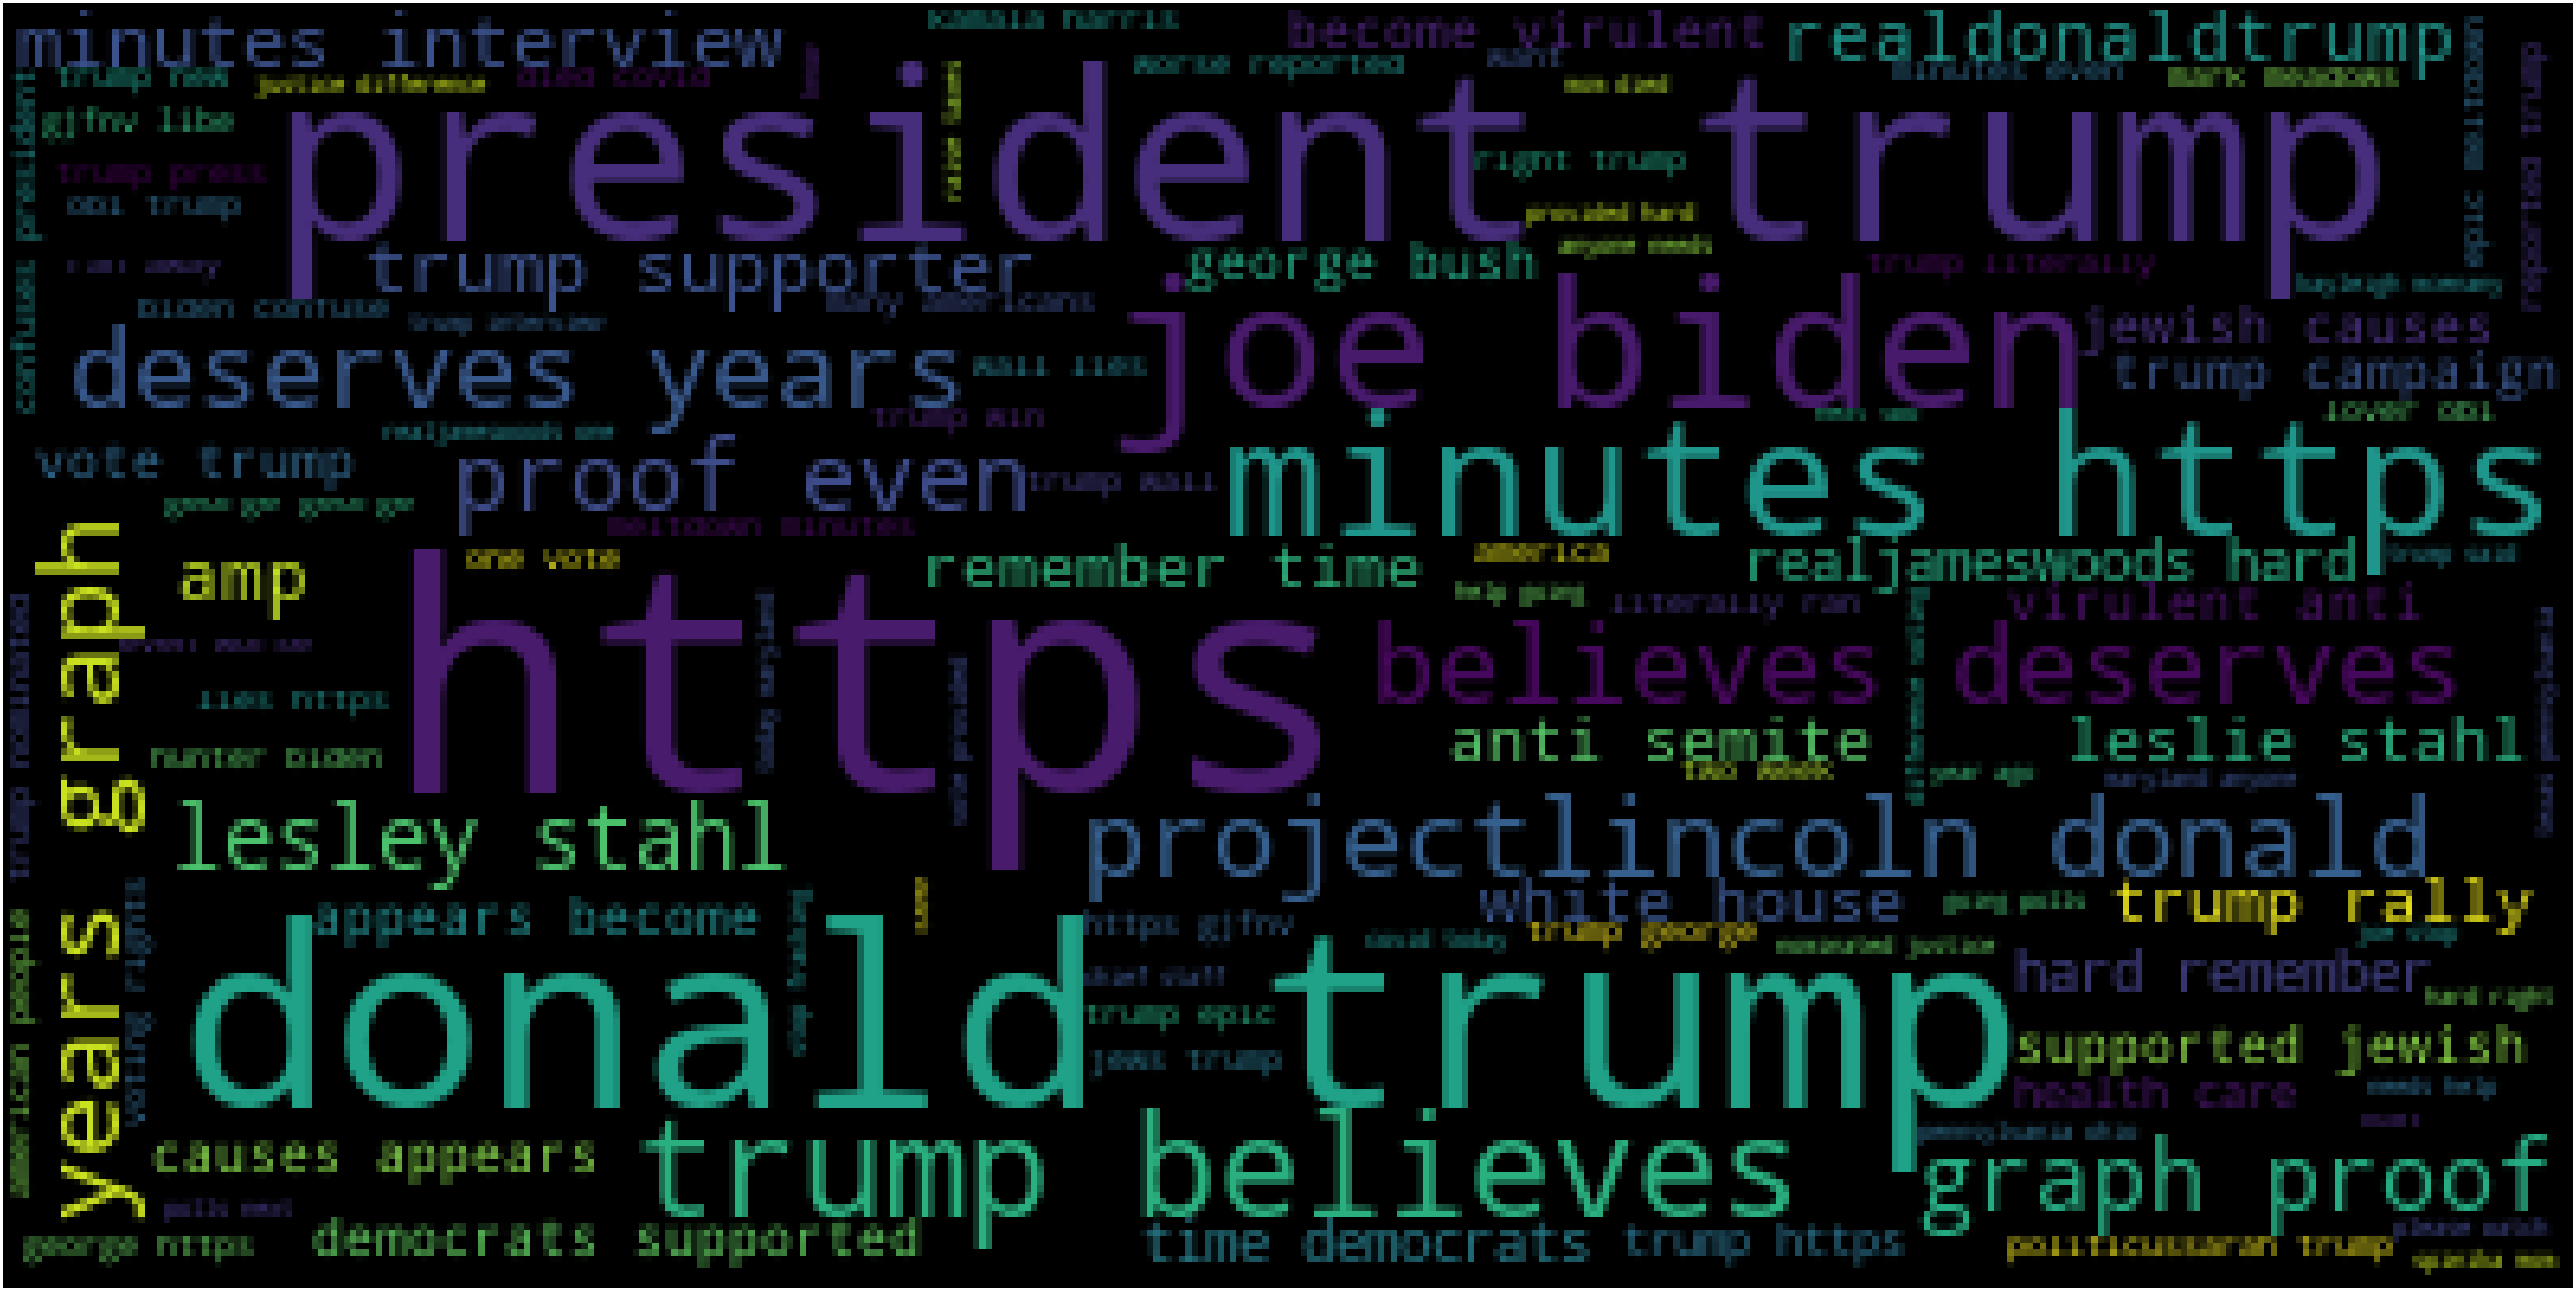

In [25]:
wc(cleaned_data_title,'black','Common Words' )

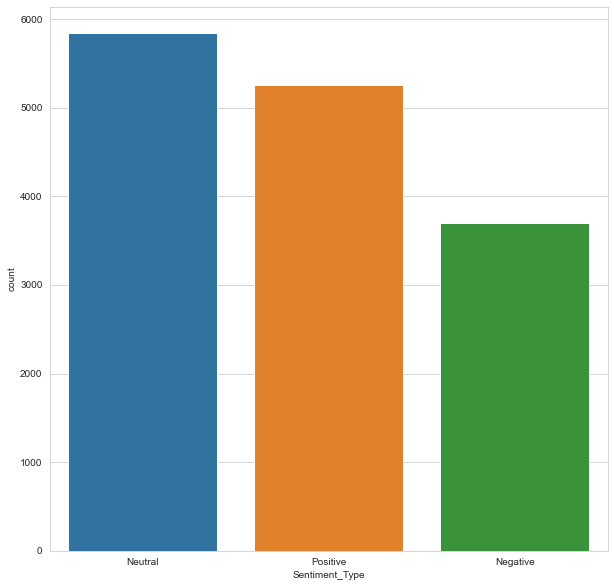

In [26]:
from textblob import TextBlob

bloblist_desc = list()

twit=dataset1['text'].astype(str)
for row in twit:
    blob = TextBlob(row)
    bloblist_desc.append((row,blob.sentiment.polarity, blob.sentiment.subjectivity))
    twit_polarity_desc = pd.DataFrame(bloblist_desc, columns = ['sentence','sentiment','polarity'])
    
def f(twit_polarity_desc):
    if twit_polarity_desc['sentiment'] > 0:
        val = "Positive"
    elif twit_polarity_desc['sentiment'] == 0:
        val = "Neutral"
    else:
        val = "Negative"
    return val

twit_polarity_desc['Sentiment_Type'] = twit_polarity_desc.apply(f, axis=1)

plt.figure(figsize=(10,10))
sns.set_style("whitegrid")
ax = sns.countplot(x="Sentiment_Type", data=twit_polarity_desc)

In [27]:
import collections, numpy as np
a=twit_polarity_desc.Sentiment_Type
neut=np.count_nonzero(a == 'Neutral')
pos=np.count_nonzero(a == 'Positive')
neg=np.count_nonzero(a == 'Negative')
popularity='{0:.2f}'.format((((neut*0.5)+(pos)+(neg*0))/(neut+pos+neg))*100)
popularity

'55.25'